In [1]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

Using TensorFlow backend.


In [8]:
def get_model():
    input_tensor = Input(shape=(96, 48, 1), dtype='float32', name='input')
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(4096, kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(4096, kernel_initializer='he_normal')(x)
    x = layers.Dropout(0.3)(x)
    output_tensor = layers.Dense(3, activation='softmax')(x)
    
    myvgg = Model(input_tensor, output_tensor)
    myvgg.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
    myvgg.summary()
    return myvgg

In [3]:

def probaToOHE(pred_test):
    for proc in pred_test:
        if proc[2] >= proc[4] and proc[2] >= proc[5]:
            proc[2] = 1
            proc[4] = 0
            proc[5] = 0
        elif proc[4] >= proc[2] and proc[4] >= proc[5]:
            proc[2] = 0
            proc[4] = 1
            proc[5] = 0
        elif proc[5] >= proc[4] and proc[5] >= proc[2]:
            proc[2] = 0
            proc[4] = 0
            proc[5] = 1
    for proc in pred_test:
        if proc[0] >= proc[1] and proc[0] >= proc[3]:
            proc[0] = 1
            proc[1] = 0
            proc[3] = 0
        elif proc[1] >= proc[0] and proc[1] >= proc[3]:
            proc[0] = 0
            proc[1] = 1
            proc[3] = 0
        elif proc[3] >= proc[1] and proc[3] >= proc[0]:
            proc[0] = 0
            proc[1] = 0
            proc[3] = 1
    return pred_test

In [9]:
model = get_model()
file_path="my_ecg.h5"
model.load_weights(file_path)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 96, 48, 1)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 96, 48, 64)        640       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 96, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 24, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 48, 24, 128)       73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 48, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 12, 128)       0   

In [32]:
Test = io.loadmat('./testImg_half_shape_V1.mat')
X, y = Test['data'], Test['label']
X = X/255.0
# print(y.shape)
# print("[INFO] class labels:")
# mlb = MultiLabelBinarizer()
# y = mlb.fit_transform(y)
# for (i, label) in enumerate(mlb.classes_):
#     print("{}. {}".format(i + 1, label))
# classes = len(mlb.classes_)
# print(y.shape)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 1 ... 2 2 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
X_reshape = X.reshape(X.shape[0], 96, 48, 1)
pred_test = model.predict(X_reshape)


In [24]:
pred_test_label = np.argmax(pred_test, axis=-1)

In [26]:
pred_test_label

array([0, 1, 1, ..., 2, 2, 0])

In [27]:
accuracy_score(pred_test_label, y)

0.9121771217712177

In [21]:
accuracy_score(probaToOHE_noVT(pred_test), y)

0.7944055944055944

In [10]:
f1_score(probaToOHE(pred_test), y, average="macro")

0.8254272380462336

In [116]:
y[0]

array([0, 1, 0, 0, 1, 0])

In [118]:
nor_y = []
nor_pred=[]
for (i, e) in enumerate(y):
    if y[i][1]!=1 and y[i][4] != 1:
        nor_y.append(y[i])
        nor_pred.append(pred_test[i])


In [4]:
leads = ['V1', 'V5', 'II']

Pred = []
Y = []
for lead in leads:
    model = get_model()
    file_path="my_ecg_multilable_"+lead+".h5"
    model.load_weights(file_path)
    
    Test = io.loadmat('./testImg_half_'+lead+'.mat')
    X, y = Test['data'], Test['label']
    X = X/255.0
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(y)
    Y.append(y)

    X_reshape = X.reshape(X.shape[0], 96, 48, 1)
    pred_test = model.predict(X_reshape)
    
    Pred.append(pred_test)
    

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 96, 48, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 12, 128)       0   

In [22]:
accuracy_score(probaToOHE(Pred[0]), Y[0])

0.8757679180887372

In [23]:
accuracy_score(probaToOHE(Pred[1]), Y[1])

0.8068259385665529

In [24]:
accuracy_score(probaToOHE(Pred[2]), Y[2])

0.78839590443686

In [18]:
adder = []
for i,j,k in zip(Pred[0], Pred[1], Pred[2]):
    adder.append(i*0.4 + j*0.3 + k*0.3)
adder = np.array(ensemble)

In [19]:
accuracy_score(probaToOHE(adder), y)

0.8716723549488055

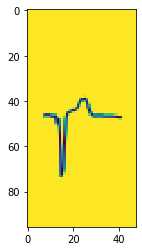

['lbbb']


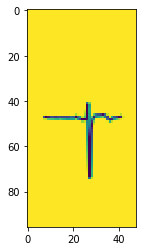

['nor ']


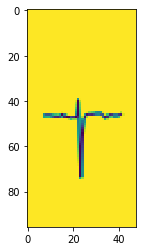

['nor ']


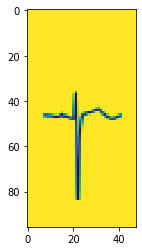

['nor ']


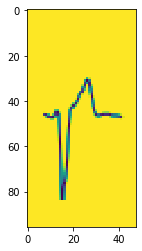

['lbbb']


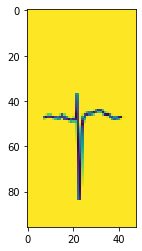

['nor ']


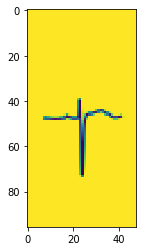

['nor ']


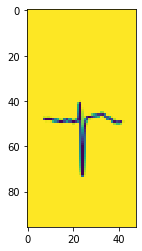

['nor ']


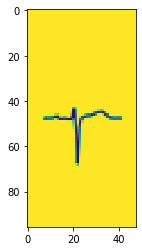

['nor ']


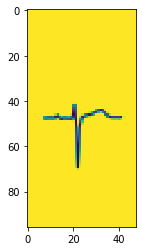

['nor ']


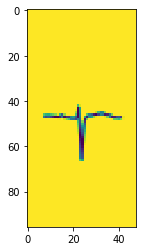

['nor ']


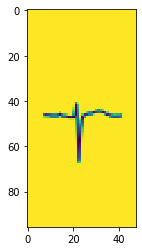

['nor ']


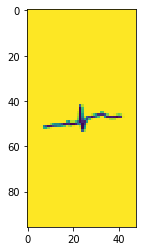

['nor ']


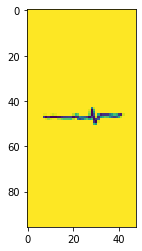

['nor ']


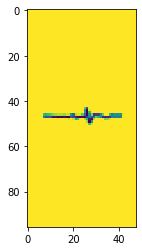

['nor ']


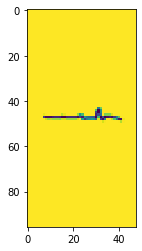

['nor ']


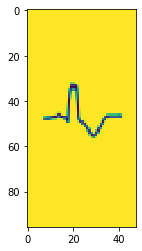

['rbbb']


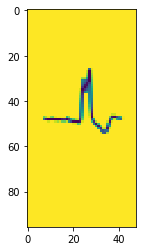

['rbbb']


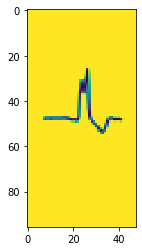

['rbbb']


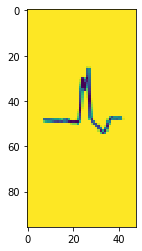

['rbbb']


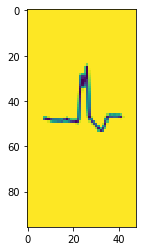

['rbbb']


KeyboardInterrupt: 

In [9]:
cnt=0 
def comps(a, b):
    if a[0] == b[0] and a[1] ==b[1]and a[2] ==b[2] and a[3] ==b[3] and a[4] ==b[4]:
        return True
    else:
        return False
    
for i in range(X.shape[0]):
    cnt+=1
    plt.imshow(X[i].reshape(96, 48)) 
    plt.show()
    print(y[i])

print(cnt)

# 1. lbbb 
# 2. nor  
# 3. pvc  
# 4. rbbb 
# 5. sinus
# 6. vt